# Notebook 5 - Lime

### 1. Imports + Setup

In [1]:
from constants import *

In [29]:
import numpy as np
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

import cv2

import glob

import tensorflow
from tensorflow.keras.models import load_model

In [3]:
# Set up multiple outputs for cells
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### 2. Constants

In [4]:
mobile_net = load_model('mobile_net_v0_0.88.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### 3. Explore melanoma probas

In [5]:
def read_pre_process_predict_imgs(dir_path='../data_processed/test/mel/*.jpg'):
    imgs = []
    scores = []
    
    all_paths = glob.glob(dir_path)
    
    for path in all_paths:
        # Read image
        img = plt.imread(path)
        # MobileNet pre process + Predict
        score = mobile_net.predict(np.expand_dims(tensorflow.keras.applications.mobilenet.preprocess_input(img),
                                                  axis=0))[0][0]
        # Store imgs and scores
        imgs.append(img)
        scores.append(score)
    
    return imgs, scores

In [6]:
mel_imgs, mel_scores = read_pre_process_predict_imgs()

In [7]:
non_mel_imgs, non_mel_scores = read_pre_process_predict_imgs('../data_processed/test/other/*.jpg')

In [13]:
# # Sort accordingly to score
# mel_scores, mel_imgs = zip(*sorted(zip(mel_scores, mel_imgs)))

### 4. Visualize right and wrong

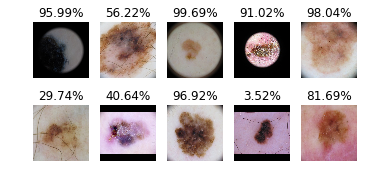

In [14]:
fig = plt.figure(figsize=(12, 12))
for i in range(10):
    _ = plt.subplot(2, 5, i + 1, title='{0:.2%}'.format(mel_scores[i]))
    _ = plt.axis('off')
    _ = plt.imshow(mel_imgs[i])

fig.subplots_adjust(right=.5, top=0.3)
# fig.savefig('')

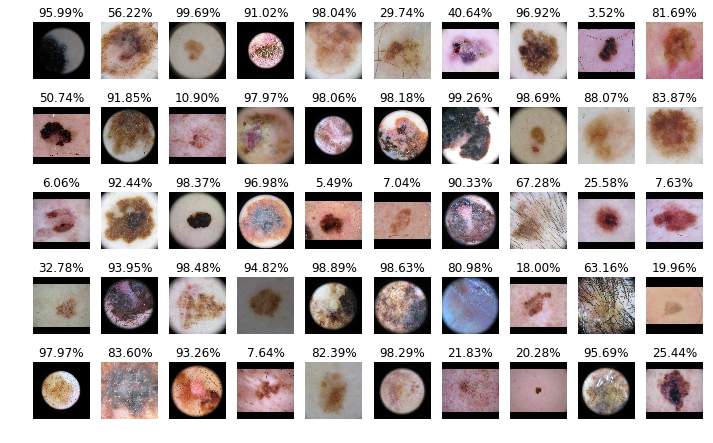

In [15]:
fig = plt.figure(figsize=(12, 12))
for i in range(50):
    _ = plt.subplot(5, 10, i + 1, title='{0:.2%}'.format(mel_scores[i]))
    _ = plt.axis('off')
    _ = plt.imshow(mel_imgs[i])

fig.subplots_adjust(top=.6)
# fig.savefig('')

### 5. Interpretation on right classification

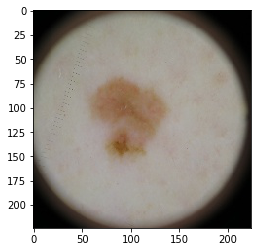

In [34]:
img_1 = mel_imgs[2]
_ = plt.imshow(img_1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


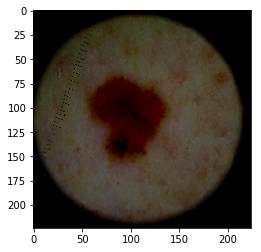

In [35]:
img_1 = tensorflow.keras.applications.mobilenet.preprocess_input(img_1)
_ = plt.imshow(img_1)

In [36]:
prob = mobile_net.predict(np.expand_dims(img_1, axis=0))[0][0]
prob

0.9968829

In [37]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(img_1, mobile_net.predict, top_labels=2, num_samples=1000)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


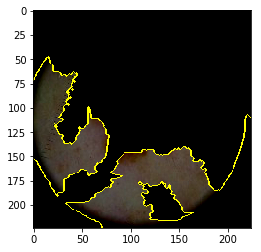

In [38]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, 
                                            num_features=9, hide_rest=True)
plt.imshow(mark_boundaries(temp, mask))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


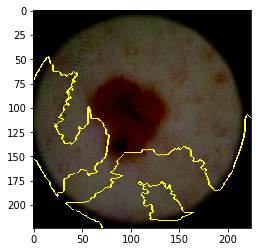

In [39]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, 
                                            num_features=9, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


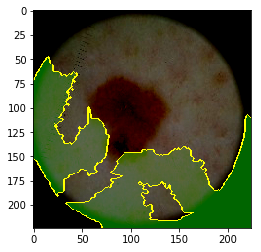

In [40]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, 
                                            num_features=9, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


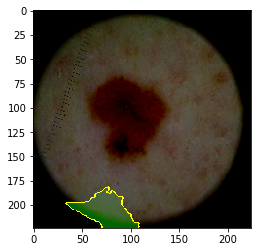

In [41]:
# min_weight=0.0015
# min_weight=0.002
# min_weight=0.001
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], 
                                            positive_only=False, 
                                            num_features=9, 
                                            hide_rest=False,
                                            min_weight=0.01)
plt.imshow(mark_boundaries(temp, mask))

### 6. Interpretation on wrong classifications

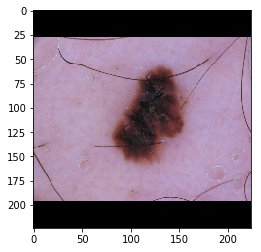

In [43]:
img_2 = mel_imgs[8]
plt.imshow(img_2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


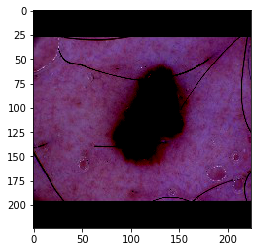

In [44]:
img_2 = tensorflow.keras.applications.mobilenet.preprocess_input(img_2)
plt.imshow(img_2)

In [46]:
prob_2 = mobile_net.predict(np.expand_dims(img_2, axis=0))[0][0]
prob_2

0.035213187

In [47]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(img_2, mobile_net.predict, top_labels=2, num_samples=1000)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


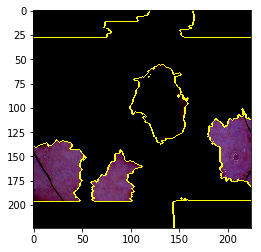

In [48]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=9, hide_rest=True)
plt.imshow(mark_boundaries(temp, mask))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


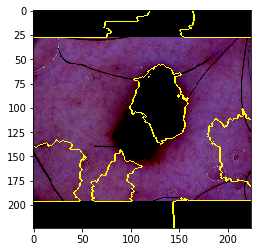

In [49]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=9, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


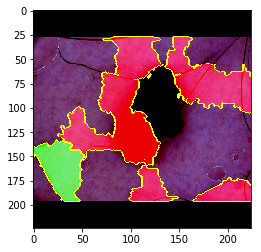

In [50]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=9, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


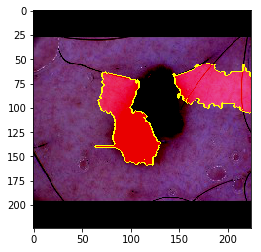

In [52]:
# min_weight=0.0015
# min_weight=0.002
# min_weight=0.001
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], 
                                            positive_only=False, 
                                            num_features=9, 
                                            hide_rest=False,
                                            min_weight=0.05)
plt.imshow(mark_boundaries(temp, mask))